 __STAT40800 Data Programming with Python Final Project__
__Made By: Divya Dwivedi: 22200315__


**1(a) Load the neurons group 1.csv dataset into Python as a pandas DataFrame.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.figure as fig
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
neu1=pd.read_csv('neurons_group_1.csv')

In [3]:
neu1.head()

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume
0,484775243,0.195628,90.3529,548.798070,257.109717,128.269219,3658.629571,2252.681880,115.626135
1,485996843,0.457635,87.0383,717.408343,199.214267,430.635072,4158.819949,5944.196007,730.014704
2,486041253,0.295455,75.3286,584.083922,386.076695,502.033948,2667.618389,2472.795020,197.063796
3,491119181,0.414033,89.0718,284.641670,239.492610,383.828302,1543.941010,2008.838025,237.466517
4,491119245,0.201323,44.5237,302.038542,323.493562,120.229052,1621.871325,1027.220686,54.521240


**(b) Inspect the data. How many neurons are included in this dataset? How many different measurements are included? Does this dataset contain any missing values?**

In [4]:
#number of neurons present in the dataset

print('The number of neurons present in the first dataset are:', len(neu1))

The number of neurons present in the first dataset are: 311


In [5]:
#How many different measurements are included?
# We ignore the first column 'id' since it is used to identify the unique neuron and is not a type of measurement.

print('The number of different measurements included in the dataset are:',len(neu1.axes[1])-1)



The number of different measurements included in the dataset are: 8


In [6]:
#Listing the different measurements 

column_names=list(neu1)

print('The different measurements included in the dataset are:\n',column_names[1:9])

The different measurements included in the dataset are:
 ['average_diameter', 'overall_depth', 'overall_height', 'overall_width', 'soma_surface', 'total_length', 'total_surface', 'total_volume']


In [7]:
#Does this dataset contain any missing values?

neu1.isnull().sum()

id                  0
average_diameter    0
overall_depth       0
overall_height      0
overall_width       0
soma_surface        0
total_length        0
total_surface       0
total_volume        0
dtype: int64

Hence, as per the observation above we can confirm that this data set does not contain any missing values.

**(c) Perform an exploratory data analysis, creating both numerical and graphical summaries of the data. Discuss and interpret your results.**

In [8]:
neu1.describe()

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume
count,3.110000e+02,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,5.885866e+08,0.421175,91.967024,523.516774,320.548089,361.849689,3792.940198,5492.737135,808.488483
std,8.490396e+07,0.159435,35.658760,299.256684,124.039953,253.912293,2775.993259,5719.713426,1190.466808
min,4.847752e+08,0.053899,22.680000,82.836871,49.173247,2.895610,251.987893,402.242787,4.309842
25%,4.961239e+08,0.322128,64.574450,328.964661,233.480547,176.194233,2237.031837,2253.626506,197.071679
50%,5.912744e+08,0.415613,86.212200,469.151885,291.532148,311.568275,2946.858866,3636.755377,407.180171
75%,6.568502e+08,0.527572,115.566350,651.885452,392.534334,478.796933,4085.692910,5895.663836,833.681728
max,8.460831e+08,1.156730,183.960000,1928.118350,827.752239,1283.720986,15697.415190,37182.284100,8482.061401


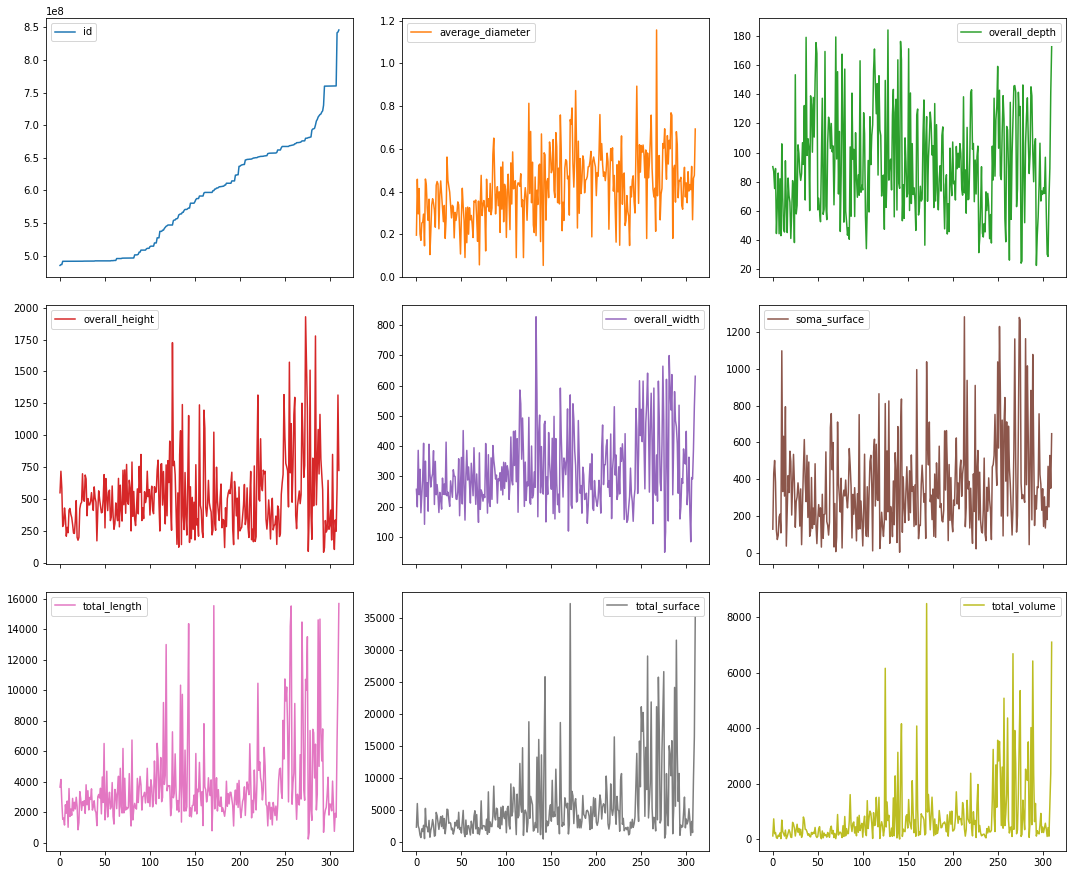

In [9]:
axes = neu1.plot(subplots=True, layout=(4,3), figsize=(15, 16))

# flatten the axes array to easily access any subplot
axes = axes.flat

# extract the figure object
fig = axes[0].get_figure()

# use tight_layout
fig.tight_layout()

The data above summarizes the dataset into numerical and graphical figures.

As per the numerical statistical data, it can be seen that there are a total of 311 observations about the morphology of a group of brain cell, known as neurons.

The data set is segregated  into 8 different measurements:

'average_diameter', 'overall_depth', 'overall_height', 'overall_width', 'soma_surface', 'total_length', 'total_surface', 'total_volume'

1. Average Diameter is ranging from 0.053 to 1.156 with average size of 0.421 units. From the plot, it is observed that the data points are crowded towards the right hand side of the curve which is confirmed by its median being 0.415 which is in close proximity to its mean. Hence, Average Diameter entity values can be calculated using its mean and median since they are almost equal to each other making it a symmetric distribution.

2. Overall depth ranges from 22.68 to 183.96 with its average at 91.96 units. It is also observed that the median (86.21) is less than its mean (91.96) which means that this is positively skewed which can be confirmed by the graphical plot with multiple data points at the start with a drop in values towards the right with a few outliers. A slight deviation is also seen which is confirmed by std=35.65

3. Overall height is ranging from 82.83 to 1928.11 units with its average at 523.516 units. Its median is located at 469.15 confirming that this set is also Right skewed. There is also a lot of deviation observed in this (standard deviation = 299.25) making it not very reliable.

4. Overall width is ranging from 49.17 to 827.75 with its average at 320.54 units. Its median is located at 291.53 making this graph right skewed/positively skewed. The interquantile range for the same is 159.054. There is some standard deviation observed from this entity (124.039) however, it is less compared to Overall height parameter.

5. Soma Surface ranges from 2.89 to 1283.72 with its average at 361.84.Its median is located at 311.56 making this graph slightly positively skewed. The IQR range for this is 302.6. There are multiple outliers in this plot as confirmed by its IQR and plot distribution.

6. Total length ranges from 251.98 to 115697.415 with its average at 3792.94.Its median is located at 2946.858 making this graph highly positively skewed. The IQR range for this is 1848.659. There are multiple outliers in this plot as confirmed by its IQR and plot distribution. The deviation observed in this datapoint is high with the value of std at 2775.993.

7. Total surface ranges from 402.24 to 37182.284 with its average at 5492.737.Its median is located at 3636.755 making this graph highly positively/Right skewed. The IQR range for this is 3642.03. There are multiple outliers in this plot as confirmed by its IQR and plot distribution. The deviation observed in this datapoint is the highest compared to other measurements with the value of std at 5719.7134.

8. Total volume ranges from 4.309 to 8482.061 with its average at 808.488.Its median is located at 407.18 making this graph highly positively/Right skewed. The IQR range for this is 636.61. There are multiple outliers in this plot as confirmed by its IQR and plot distribution. The deviation observed in this datapoint is the highest compared to other measurements with the value of std at 1190.466.

**2(a) Load the neurons group 2.csv dataset into Python as a pandas DataFrame.**

In [10]:
neu2=pd.read_csv('neurons_group_2.csv')
neu2.head()

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume
0,397905347,0.316091,117.5429,585.602322,287.122628,268.777679,3498.090031,3523.606841,306.290931
1,491119234,0.331268,81.9012,461.280515,275.146120,551.788645,2008.302439,2097.688550,188.431435
2,491119269,0.139015,57.5697,324.422347,280.851229,50.092109,1774.258366,776.076427,25.733000
3,491119394,0.230412,76.0357,368.298267,251.377567,244.457685,1650.188964,1198.531518,75.823080
4,491119419,0.321163,98.8344,417.890620,193.590563,252.423672,2066.369729,2085.789861,180.446414


**(b) Inspect the data. How many neurons are included in this dataset? Are the measurements the same as those in neurons group 1.csv?**

In [11]:
#number of neurons present in the dataset

print('The number of neurons present in the second dataset are:', len(neu2))

The number of neurons present in the second dataset are: 390


In [12]:
print('The number of different measurements included in the second dataset are:',len(neu1.axes[1])-1)

The number of different measurements included in the second dataset are: 8


Yes, the measurements are same as those in neurons group 1.csv data set. However, there are 390 neurons present in the second dataset as compared to 311 in the first csv file.

**(c) Perform a t-test, for each of the measurements, to test whether any of the neuron
properties differ between the group 1 and group 2. Use a significance level of α =
0.01. Display the t-score and p-value for each measurement. Clearly state the
conclusion of your tests and explain your reasoning.**

A significance level, also known as alpha or α, is an evidentiary standard that a researcher sets before the study. It defines how strongly the sample evidence must contradict the null hypothesis before you can reject the null hypothesis for the entire population. The strength of the evidence is defined by the probability of rejecting a null hypothesis that is true. In other words, it is the probability that you say there is an effect when there is no effect.

P-values are the probability that a sample will have an effect at least as extreme as the effect observed in the sample if the null hypothesis is correct.

Alpha, the significance level, is the probability that you will make the mistake of rejecting the null hypothesis when in fact it is true. The p-value measures the probability of getting a more extreme value than the one you got from the experiment. If the p-value is greater than alpha, you accept the null hypothesis.


In [13]:
#For Average Diameter

a1=neu1['average_diameter']
b1=neu2['average_diameter']
t1 = stats.ttest_ind(a1,b1)
t1

Ttest_indResult(statistic=-1.1970075781748382, pvalue=0.23170939849935634)

_The test statistic value of Average Diamater entity is -1.19700 and the p-value is 0.2317. 
Since, the p-value 0.231 is greater than the significance level α = 0.01, we accept the null hypothesis._

In [14]:
#For Overall Depth

a2=neu1['overall_depth']
b2=neu2['overall_depth']
t2 = stats.ttest_ind(a2,b2)
t2

Ttest_indResult(statistic=-1.1857230913955603, pvalue=0.23613458215666971)

_The test statistic value of Overall Depth entity is -1.1857 and the p-value is 0.2361. 
Since, the p-value is greater than the significance level α = 0.01, we accept the null hypothesis._

In [15]:
#For Overall Height

a3=neu1['overall_height']
b3=neu2['overall_height']
t3 = stats.ttest_ind(a3,b3)
t3

Ttest_indResult(statistic=0.5860348440044614, pvalue=0.5580412742530052)

_The test statistic value of Overall Height entity is 0.586 and the p-value is 0.5580. 
Since, the p-value is greater than the significance level α = 0.01, we accept the null hypothesis._

In [16]:
#For Soma Surface

a4=neu1['soma_surface']
b4=neu2['soma_surface']
t4 = stats.ttest_ind(a4,b4)
t4

Ttest_indResult(statistic=-0.547797643314149, pvalue=0.5840057333717408)

_The test statistic value of Soma surface entity is -0.547 and the p-value is 0.584. 
Since, the p-value is greater than the significance level α = 0.01, we accept the null hypothesis._

In [17]:
#For Total Length

a5=neu1['total_length']
b5=neu2['total_length']
t5 = stats.ttest_ind(a5,b5)
t5

Ttest_indResult(statistic=-0.332599650604377, pvalue=0.7395362277560685)

_The test statistic value of Total length entity is -0.3325 and the p-value is 0.7395. 
Since, the p-value is greater than the significance level α = 0.01, we accept the null hypothesis._

In [18]:
#For Total Surface

a6=neu1['total_surface']
b6=neu2['total_surface']
t6 = stats.ttest_ind(a6,b6)
t6

Ttest_indResult(statistic=-0.8152397825540432, pvalue=0.4152127535605644)

_The test statistic value of Total surface entity is -0.815 and the p-value is 0.415. 
Since, the p-value is greater than the significance level α = 0.01, we accept the null hypothesis._

In [19]:
#For Total volume

a7=neu1['total_volume']
b7=neu2['total_volume']
t7 = stats.ttest_ind(a7,b7)
t7

Ttest_indResult(statistic=-0.9313735524535135, pvalue=0.35198192808008355)

_The test statistic value of Total volume entity is -0.9313 and the p-value is 0.351. 
Since, the p-value is greater than the significance level α = 0.01, we accept the null hypothesis._

---------------
From the observations above, it is evident that the p-value is greater than the significance level of 0.01 for each measurement.

This does not always necessarily mean that the we accept the null hypothesis as true; However, it confirms that there is not currently enough evidence to conclude that it is true.

**3(a) Load the neurons additional measurements.csv into Python and combine all
three datasets into a single DataFrame.**

In [20]:
neu3=pd.read_csv('neurons_additional_measurements.csv')
neu3

,id,average_bifurcation_angle_local,average_contraction,average_fragmentation,average_parent_daughter_ratio,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,number_nodes,number_stems,number_tips
0,491119743,82.727781,0.864267,20.723077,0.964510,6,99.779724,126.593790,33,73,1470,7,40
1,546781359,82.506680,0.903890,105.277778,0.862183,3,432.383110,496.831994,9,23,2011,5,14
2,537042261,77.536678,0.863104,73.666667,0.926633,6,373.630444,436.958952,21,46,3137,4,25
3,689123605,76.583222,0.900537,95.979167,0.942049,11,943.382549,989.448318,24,52,4652,4,28
4,657879305,72.019250,0.873518,47.535714,1.000000,5,186.218009,221.639502,14,32,1406,4,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,591276216,80.712983,0.869245,31.283333,0.981943,11,272.156210,326.773120,30,65,2088,5,35
690,496163999,56.393455,0.912145,93.900000,0.780672,1,194.308797,201.927065,5,18,1284,8,13
691,675799126,74.569053,0.892567,92.023077,0.974234,18,1046.365593,1157.225329,65,139,12338,9,74
692,667319659,83.006268,0.897934,118.800000,0.991928,3,379.871901,420.167325,10,26,2468,6,16


In [21]:
#Concatenate first two datasets and merge into the third one
neu4=pd.concat([neu1, neu2])
neu=pd.merge(neu4,neu3,on='id',how='outer')
neu

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume,average_bifurcation_angle_local,...,average_fragmentation,average_parent_daughter_ratio,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,number_nodes,number_stems,number_tips
0,484775243,0.195628,90.3529,548.798070,257.109717,128.269219,3658.629571,2252.681880,115.626135,78.026948,...,48.081967,0.866582,7.0,476.921223,550.691106,31.0,70.0,3041.0,8.0,39.0
1,485996843,0.457635,87.0383,717.408343,199.214267,430.635072,4158.819949,5944.196007,730.014704,86.349668,...,52.416667,0.950502,15.0,650.637431,957.710930,30.0,67.0,3271.0,7.0,37.0
2,486041253,0.295455,75.3286,584.083922,386.076695,502.033948,2667.618389,2472.795020,197.063796,71.911353,...,73.821429,0.816243,5.0,477.440600,569.974920,14.0,32.0,2151.0,4.0,18.0
3,491119181,0.414033,89.0718,284.641670,239.492610,383.828302,1543.941010,2008.838025,237.466517,72.177287,...,42.266667,0.822614,4.0,212.448082,249.521471,16.0,35.0,1292.0,3.0,19.0
4,491119245,0.201323,44.5237,302.038542,323.493562,120.229052,1621.871325,1027.220686,54.521240,70.758367,...,39.733333,0.803137,3.0,242.351930,258.868561,15.0,36.0,1397.0,6.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,760010721,0.375704,67.2280,306.770911,216.055257,225.837006,2607.623334,3077.924198,287.670058,91.555459,...,44.804348,0.987527,6.0,188.685223,221.489383,23.0,52.0,2246.0,6.0,29.0
697,760239945,0.423685,60.2975,290.299646,327.310902,356.208499,2262.953570,3040.696842,377.968196,77.900825,...,41.613636,0.811129,4.0,208.960395,230.849635,22.0,48.0,1934.0,4.0,26.0
698,841883190,0.682420,140.7840,1465.667623,549.027038,589.639480,16393.372040,35156.450590,6387.544545,76.931788,...,82.807229,0.983187,17.0,1279.217738,1399.216195,83.0,174.0,13862.0,8.0,91.0
699,842845581,0.500792,172.8656,736.768599,487.972675,412.997691,7001.423255,11103.672810,1470.613203,65.800629,...,61.347368,1.001120,7.0,574.428357,681.880147,48.0,101.0,5874.0,5.0,53.0


**(b) Comment on the dimensions of the combined dataset. Are all of the neurons from
group 1 and 2 included in the dataset neurons additional measurements.csv?**

In [22]:
#Dimension of combined data set
neu.shape

(701, 21)

In [23]:
#Checking if neurons from group 1 are included in the dataset neurons additional measurement.
neu4=neu1.assign(Inneu3=neu1.id.isin(neu3.id).astype(int))
neu4

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume,Inneu3
0,484775243,0.195628,90.3529,548.798070,257.109717,128.269219,3658.629571,2252.681880,115.626135,1
1,485996843,0.457635,87.0383,717.408343,199.214267,430.635072,4158.819949,5944.196007,730.014704,1
2,486041253,0.295455,75.3286,584.083922,386.076695,502.033948,2667.618389,2472.795020,197.063796,1
3,491119181,0.414033,89.0718,284.641670,239.492610,383.828302,1543.941010,2008.838025,237.466517,1
4,491119245,0.201323,44.5237,302.038542,323.493562,120.229052,1621.871325,1027.220686,54.521240,1
...,...,...,...,...,...,...,...,...,...,...
306,760004770,0.517693,28.8294,335.656152,296.083625,470.139877,1935.489678,3153.303286,415.874390,1
307,760196580,0.267869,68.1800,247.547693,291.582190,249.288252,1682.421703,1411.088094,106.669856,1
308,841869334,0.462304,89.3004,585.271698,389.567416,529.311813,6640.732080,9759.033027,1262.798767,0
309,842851116,0.475475,141.1113,1314.912690,530.384340,351.041686,10469.516360,16355.821720,2371.632086,1


In [24]:
#Checking if neurons from group 2 are included in the dataset neurons additional measurement.
neu5=neu2.assign(Inneu3=neu2.id.isin(neu3.id).astype(int))
neu5

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume,Inneu3
0,397905347,0.316091,117.5429,585.602322,287.122628,268.777679,3498.090031,3523.606841,306.290931,1
1,491119234,0.331268,81.9012,461.280515,275.146120,551.788645,2008.302439,2097.688550,188.431435,1
2,491119269,0.139015,57.5697,324.422347,280.851229,50.092109,1774.258366,776.076427,25.733000,1
3,491119394,0.230412,76.0357,368.298267,251.377567,244.457685,1650.188964,1198.531518,75.823080,1
4,491119419,0.321163,98.8344,417.890620,193.590563,252.423672,2066.369729,2085.789861,180.446414,1
...,...,...,...,...,...,...,...,...,...,...
385,760010721,0.375704,67.2280,306.770911,216.055257,225.837006,2607.623334,3077.924198,287.670058,1
386,760239945,0.423685,60.2975,290.299646,327.310902,356.208499,2262.953570,3040.696842,377.968196,1
387,841883190,0.682420,140.7840,1465.667623,549.027038,589.639480,16393.372040,35156.450590,6387.544545,1
388,842845581,0.500792,172.8656,736.768599,487.972675,412.997691,7001.423255,11103.672810,1470.613203,1


In [25]:
neu4['Inneu3'].value_counts()

1    306
0      5
Name: Inneu3, dtype: int64

In [26]:
neu5['Inneu3'].value_counts()

1    388
0      2
Name: Inneu3, dtype: int64

In [27]:
#Checking for missing values in the model
neu.isnull().sum()

id                                 0
average_diameter                   0
overall_depth                      0
overall_height                     0
overall_width                      0
soma_surface                       0
total_length                       0
total_surface                      0
total_volume                       0
average_bifurcation_angle_local    7
average_contraction                7
average_fragmentation              7
average_parent_daughter_ratio      7
max_branch_order                   7
max_euclidean_distance             7
max_path_distance                  7
number_bifurcations                7
number_branches                    7
number_nodes                       7
number_stems                       7
number_tips                        7
dtype: int64

From the observation above it is clear that not all neurons from group 1 and group 2 are included in the dataset neurons_additional_measurements.csv.

In group 1, out of 311 neurons, 306 are present in the Additional measurement dataset and 5 are not included in the same.

In group 2, out of 390 neurons, 388 are present in the Additional measurement dataset and 2 are not included in the same.

In the combined dataset it can be seen that the shape of the DataFrame is (701, 21) i.e 701 rows and 21 columns. This is the combination of all three datasets to obtain a collective dataset.


**(c) Compute the Pearson correlation coefficient between each of the measurements and
identify which morphological features are strongly correlated. List the four most
strongly correlated pairs.**

In [28]:
neu=neu.fillna(neu.mean())

In [29]:
corr=neu.corr().round(4) #Listing the correlation coefficients between each measurement
corr

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume,average_bifurcation_angle_local,...,average_fragmentation,average_parent_daughter_ratio,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,number_nodes,number_stems,number_tips
id,1.0000,0.3829,0.0369,0.1134,0.2699,0.1717,0.2662,0.3378,0.3053,0.2039,...,0.2217,0.4317,0.0140,0.0588,0.0603,0.1356,0.1197,0.2592,-0.1798,0.1044
average_diameter,0.3829,1.0000,0.2263,0.3278,0.3657,0.5876,0.3518,0.6190,0.6586,0.0394,...,0.3532,0.2745,0.1726,0.2998,0.3131,0.1646,0.1513,0.3451,-0.1316,0.1383
overall_depth,0.0369,0.2263,1.0000,0.5252,0.5148,0.2371,0.5661,0.4815,0.4042,-0.0670,...,0.4189,0.0040,0.4952,0.5403,0.5792,0.4333,0.4333,0.5509,0.1664,0.4315
overall_height,0.1134,0.3278,0.5252,1.0000,0.4682,0.3070,0.6588,0.6177,0.5406,-0.1702,...,0.5446,-0.0572,0.6129,0.9520,0.9388,0.4312,0.4244,0.6539,0.0667,0.4163
overall_width,0.2699,0.3657,0.5148,0.4682,1.0000,0.3994,0.6794,0.6594,0.5786,-0.0885,...,0.6530,0.1070,0.2691,0.4813,0.5005,0.3698,0.3640,0.6712,0.0613,0.3574
soma_surface,0.1717,0.5876,0.2371,0.3070,0.3994,1.0000,0.4279,0.5476,0.5350,-0.0627,...,0.3289,0.1092,0.1550,0.2624,0.2646,0.2657,0.2625,0.4266,0.0551,0.2584
total_length,0.2662,0.3518,0.5661,0.6588,0.6794,0.4279,1.0000,0.9133,0.7897,-0.1437,...,0.4562,0.1026,0.5982,0.6407,0.6537,0.8163,0.8105,0.9968,0.2342,0.8021
total_surface,0.3378,0.6190,0.4815,0.6177,0.6594,0.5476,0.9133,1.0000,0.9586,-0.1239,...,0.4738,0.1829,0.4948,0.5969,0.6079,0.6842,0.6736,0.9092,0.1130,0.6613
total_volume,0.3053,0.6586,0.4042,0.5406,0.5786,0.5350,0.7897,0.9586,1.0000,-0.1136,...,0.4359,0.1811,0.4017,0.5199,0.5310,0.5610,0.5501,0.7866,0.0588,0.5378
average_bifurcation_angle_local,0.2039,0.0394,-0.0670,-0.1702,-0.0885,-0.0627,-0.1437,-0.1239,-0.1136,1.0000,...,-0.0334,0.1442,-0.0578,-0.1602,-0.1386,-0.1043,-0.1075,-0.1391,-0.0888,-0.1102


In [30]:
#Creating a function for listing the strongest correlation pairs in a descending order

def corrank(X: pd.DataFrame):
        import itertools
        df = pd.DataFrame([[(i,j),neu.corr(method='pearson').loc[i,j]] for i,j in list(itertools.combinations(neu.corr(method='pearson'), 2))],
                          columns=['pairs','corr']) 
        #Use itertools.combinations to get all unique correlations from pandas own correlation matrix  
        
        print(df.sort_values(by='corr',ascending=False))
        #generate list of lists and feed it back into a DataFrame in order to use '.sort_values'.
        

corrank(corr) # prints a descending list of correlation pair (Max on top)

                                                 pairs      corr
206                     (number_branches, number_tips)  0.998230
200             (number_bifurcations, number_branches)  0.997993
116                       (total_length, number_nodes)  0.996768
203                 (number_bifurcations, number_tips)  0.992465
189        (max_euclidean_distance, max_path_distance)  0.989598
..                                                 ...       ...
156  (average_contraction, average_parent_daughter_... -0.196380
180      (average_parent_daughter_ratio, number_stems) -0.222174
155       (average_contraction, average_fragmentation) -0.232868
144  (average_bifurcation_angle_local, average_cont... -0.256651
28             (average_diameter, average_contraction) -0.261801

[210 rows x 2 columns]


Text(0.5, 1.0, 'Correlation Matrix')

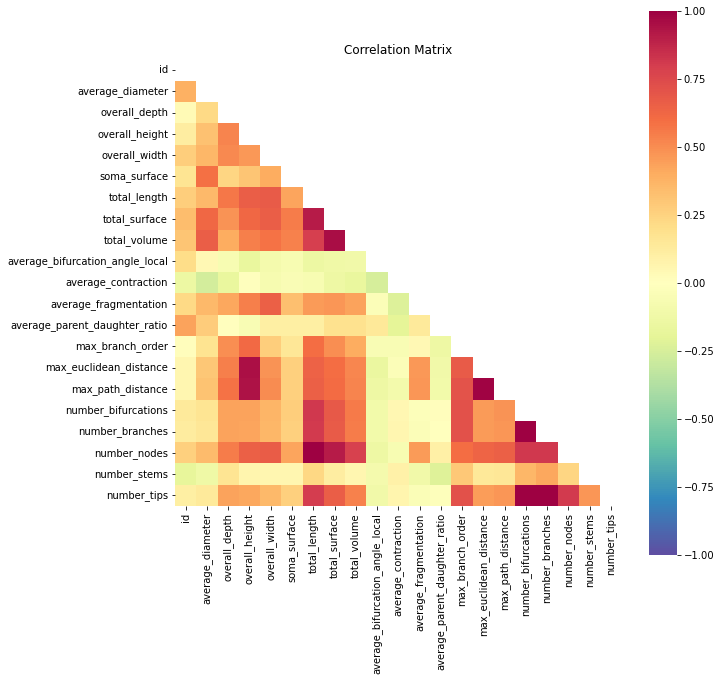

In [31]:
#Plotting a Correlation matrix

corrs = neu.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')

The correlation has been calculated between each of the measurements in the final combined dataset (neu).

From the function defined and correlation coefficients obtained we can see that the strongest correlation has been observed in the following pairs:
 
1. number_branches, number_tips **(0.99822)**
2. number_bifurcations, number_branches **(0.99799)**
3. total_length, number_nodes **(0.99676)**
4. number_bifurcations, number_tips **(0.992465)**


Additionally, I have plotted a heatmap to define the correlation matrix and visualize it more efficiently.
The basic idea of heatmaps is that they replace numbers with colors of varying shades, as indicated by the scale on the right. Cells that are lighter have higher values of r. This type of visualization can make it much easier to spot linear relationships between variables than a table of numbers. 

The results obtained above are confirmed by the heatmap produced to prove the strongest correlation between measurements mapped by the dark maroon color. 

For example, in the 'number_branches' column, the map is darkest at 'number_tips' color corresponding to around 1 as per the gradient scale on the right stating they have strong positive correlation with r=0.99.


**(d) Create scatter plots for the each of the strongly correlated pairs identified in (c).
Are the relationships as expected from the correlation coefficients?**

In [32]:
stats.pearsonr(neu['number_branches'], neu['number_tips'])

(0.9982296309703613, 0.0)

In [33]:
stats.pearsonr(neu['total_length'], neu['number_nodes'])

(0.99676831513374, 0.0)

In [34]:
stats.pearsonr(neu['number_branches'], neu['number_bifurcations'])

(0.9979927159829838, 0.0)

In [35]:
stats.pearsonr(neu['number_bifurcations'], neu['number_tips'])

(0.9924651418936947, 0.0)

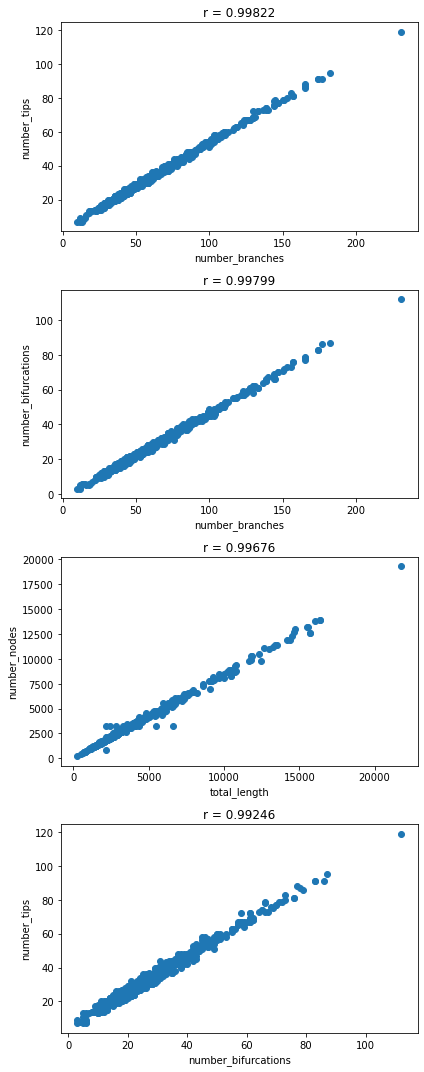

In [36]:
fig, ax = plt.subplots(4, figsize=(6, 15))
ax[0].scatter(x = neu['number_branches'], y = neu['number_tips'])
ax[0].set_xlabel("number_branches")
ax[0].set_ylabel("number_tips")
ax[0].set_title("r = 0.99822")


ax[1].scatter(x = neu['number_branches'], y = neu['number_bifurcations'])
ax[1].set_xlabel("number_branches")
ax[1].set_ylabel("number_bifurcations")
ax[1].set_title("r = 0.99799")

ax[2].scatter(x = neu['total_length'], y = neu['number_nodes'])
ax[2].set_xlabel("total_length")
ax[2].set_ylabel("number_nodes")
ax[2].set_title("r = 0.99676")

ax[3].scatter(x = neu['number_bifurcations'], y = neu['number_tips'])
ax[3].set_xlabel("number_bifurcations")
ax[3].set_ylabel("number_tips")
ax[3].set_title("r = 0.99246")


fig.tight_layout()
plt.show()

From the above scatter plots, it is evident that each of the four pairs have a strong positive correlation as per the r-value obtained above. 

**Yes, the relationship is as expected from the correlation coefficient.**

Observe the first graph, number_branches vs number_tips, we know as per the result obtained that they have the strongest correlation coefficient (r = 0.99822). The same can be confirmed by visualizing the datapoints from the dataset in the scatterplot. All points are close and clustered around the same region in a single line (best fit) indicating that the entities vary depending on each other greatly.

Similarly, we observe that as we move to the other plots with decreasing correlation coefficients the datapoints seem to move away from the best fit line showing some variance in the plot. However, we still see strong positive correlation between the measurements in the other three graphs. (number_bifurcations vs number_branches, number_bifurcations vs number_tips and max_euclidean_distance vs max_path_distance)

The last scatter plot (max_euclidean_distance vs max_path_distance) has the least value of r (0.98959) compared to the other three graphs and hence, has more deviation in data points from the line showing more outliers.



**Q4) Linear regression to predict the total surface area of a neuron (total_surface).**

***(Remaining morphological measurements to be used as predictor variables.)***

**(a) Separate the data into response and predictor variables and standardise the predictor
variables.**

In [37]:
#Checking for missing values in the model
neu.isnull().any()

#Replacing missing values by their mean
neu=neu.fillna(neu.mean())

In [38]:
response=neu['total_surface']
predictor= neu.drop(['total_surface','id'], axis = 1)

In [39]:
pred_std=(predictor-predictor.mean())/predictor.std()

In [40]:
pred_std.insert(0,'intercept',1)
X = pred_std
X.head()

,intercept,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_volume,average_bifurcation_angle_local,average_contraction,average_fragmentation,average_parent_daughter_ratio,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,number_nodes,number_stems,number_tips
0,1,-1.452697,-0.095037,0.114724,-0.519039,-0.944800,-0.062247,-0.561302,0.428604,-0.337640,-0.372286,-0.777467,-0.173561,0.337802,0.394349,0.223946,0.284144,-0.095869,0.982505,0.340209
1,1,0.176038,-0.187242,0.714469,-0.957088,0.248220,0.117147,-0.098508,1.439761,-6.017568,-0.193657,0.326642,1.730810,1.104507,2.041907,0.157300,0.186827,0.001911,0.501985,0.214253
2,1,-0.832133,-0.512980,0.240235,0.456752,0.529933,-0.417675,-0.499958,-0.314401,-0.310979,0.688414,-1.439754,-0.649654,0.340094,0.472407,-0.909035,-0.948534,-0.474236,-0.939577,-0.982333
3,1,-0.095012,-0.130675,-0.824879,-0.652334,0.063538,-0.820684,-0.469524,-0.282092,0.518195,-0.611930,-1.355941,-0.887700,-0.829463,-0.824744,-0.775743,-0.851217,-0.839424,-1.420098,-0.919355
4,1,-1.417294,-1.369903,-0.762998,-0.016765,-0.976524,-0.792734,-0.607330,-0.454481,1.336660,-0.716326,-1.612184,-1.125747,-0.697481,-0.786908,-0.842389,-0.818778,-0.794785,0.021464,-0.793399


In [41]:
pred_std.describe()

,intercept,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_volume,average_bifurcation_angle_local,average_contraction,average_fragmentation,average_parent_daughter_ratio,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,number_nodes,number_stems,number_tips
count,701.0,7.010000e+02,7.010000e+02,7.010000e+02,7.010000e+02,7.010000e+02,7.010000e+02,7.010000e+02,7.010000e+02,7.010000e+02,7.010000e+02,7.010000e+02,7.010000e+02,7.010000e+02,7.010000e+02,7.010000e+02,7.010000e+02,7.010000e+02,7.010000e+02,7.010000e+02
mean,1.0,-4.673548e-15,-4.912856e-16,1.382790e-15,-6.018327e-16,-3.013816e-16,-9.082923e-17,-1.710324e-16,4.625639e-15,9.007852e-15,-2.209993e-15,-7.461459e-15,-2.557789e-17,-3.080037e-15,7.250303e-16,2.252121e-16,-2.432671e-16,-5.024511e-17,7.329689e-16,2.652815e-16
std,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.0,-2.668748e+00,-2.000913e+00,-1.643107e+00,-2.092330e+00,-1.450902e+00,-1.284045e+00,-6.483985e-01,-3.039275e+00,-6.017568e+00,-1.698582e+00,-3.993149e+00,-1.601839e+00,-1.488968e+00,-1.524813e+00,-1.642141e+00,-1.662190e+00,-1.294739e+00,-2.381139e+00,-1.675094e+00
25%,1.0,-6.578519e-01,-7.508468e-01,-7.049844e-01,-7.164854e-01,-6.825494e-01,-5.766954e-01,-4.871450e-01,-6.713231e-01,-4.661583e-01,-6.396819e-01,-7.722479e-01,-6.496539e-01,-7.399935e-01,-7.490688e-01,-6.424516e-01,-6.565839e-01,-5.720162e-01,-4.590564e-01,-6.674421e-01
50%,1.0,-9.203339e-03,-1.242683e-01,-1.623016e-01,-2.521287e-01,-1.852279e-01,-3.166544e-01,-3.249654e-01,1.109192e-03,1.490193e-01,-2.538685e-01,2.488079e-01,-4.116075e-01,-1.698127e-01,-1.772434e-01,-2.425759e-01,-2.673171e-01,-3.020580e-01,2.146417e-02,-2.265946e-01
75%,1.0,5.988166e-01,7.059112e-01,4.631723e-01,5.513292e-01,4.431848e-01,1.494552e-01,1.321946e-02,6.741890e-01,7.058980e-01,4.083388e-01,8.999312e-01,5.405779e-01,3.889718e-01,4.430334e-01,4.238836e-01,4.463387e-01,1.502813e-01,5.019847e-01,4.661659e-01
max,1.0,4.521866e+00,2.508903e+00,5.236507e+00,7.336025e+00,6.430608e+00,6.435350e+00,1.148523e+01,4.973080e+00,1.901153e+00,8.101047e+00,2.587755e+00,4.825412e+00,5.398616e+00,5.221086e+00,5.622268e+00,5.506807e+00,6.813359e+00,3.865629e+00,5.378467e+00


**(b) Fit a linear regression model and interpret the fitted model.**

In [42]:
model = LinearRegression()
model.fit(X, response)

LinearRegression()

In [43]:
mod = sm.OLS(response,X)
lm = mod.fit()
print(lm.summary())
print(lm.aic)

                            OLS Regression Results                            
Dep. Variable:          total_surface   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     4490.
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:05:08   Log-Likelihood:                -5415.1
No. Observations:                 701   AIC:                         1.087e+04
Df Residuals:                     682   BIC:                         1.095e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
intercept 

In [44]:
print(lm.aic)

10868.137577760404


In [45]:
print(lm.bic)

10954.635227614062


**Model**: 

The method of Ordinary Least Squares(OLS) is most widely used model due to its efficiency. This model gives best approximate of true population regression line. The principle of OLS is to minimize the square of errors ( ∑ei2 ).

**Number of observations:** 

The number of observation is the size of our sample, i.e. N = 701.

**Degree of freedom(df) of residuals:** 

Degree of freedom is the number of independent observations on the basis of which the sum of squares is calculated.

D.f Residuals = 701 – (20) = 681

**R – squared value:**

R2 is the coefficient of determination that tells us that how much percentage variation independent variable can be explained by independent variable. Here, 99.2 % variation in Y can be explained by X. The maximum possible value of R2  can be 1, means the larger the R2  value better the regression. In this case we have an extremely high R2 coefficient value which means our model is well fitted.

**F – statistic:**

F test tells the goodness of fit of a regression. The test is similar to the t-test or other tests we do for the hypothesis. The F statistic value here is 4271 which is much higher than the probability F value which means we reject null hypothesis and that the values in this model is significant to obtain the prediction response.

**p – values:** 

In theory, we read that p-value is the probability of obtaining the t statistics at least as contradictory to H0  as calculated from assuming that the null hypothesis is true. In the summary of the model, we can see different values of P for each variable listed in the fifth column of the table.

**Intercept**: 

The value of B0 or the intercept here is 5699.4009 which means that in case the model is kept constant with the mean at zero and no change in other variables the predicted value of total surface would be 5699.4009. The standard error for the intercept is 20.932.

**AIC**: 

The Akaike information criterion (AIC) is a mathematical method for evaluating how well a model fits the data it was generated from. In statistics, AIC is used to compare different possible models and determine which one is the best fit for the data. AIC is calculated from:

the number of independent variables used to build the model.
the maximum likelihood estimate of the model (how well the model reproduces the data).

The AIC for the model is 10868.1375.

**BIC:**

Bayesian information criterion (BIC) is a criterion for model selection among a finite set of models. It is based, in part, on the likelihood function, and it is closely related to Akaike information criterion (AIC).
The BIC for the linear model is 10954.6352






**(c) Perform a forward selection Akaike Information Criterion (AIC) regression. Examine the selected model and discuss your findings in relation to the model fitted in
part (b).**

We now want to run a forward selection AIC regression. AIC is the Akaike information criterion.
It’s designed to penalise models with lots of explanatory variables so that we pick models which
fit the data well but aren’t too complicated. In general, if you have two models fitted to the same
data, the model with the lowest AIC is preferable. The AIC is given as part of the model summary
with OLS.
The steps to run a forward selection AIC regression are: 

1. Begin with a model that contains no
variable (other than the intercept). Run a linear regression and record the AIC. For now, this is
our current model. 

2. Find the most significant variable, i.e. the variable that lowers the AIC the
most  
   _a. Run a linear regression with the current model plus one additional variable, and record
the decrease in AIC.

    b. Repeat step 2a for each variable not included in the current model. 
    
    c. Find the variable with the biggest decrease in AIC. 
    
    d. Update the current model to include the variable that decreases the AIC the most.

3. If none of the variables lower the AIC then go to step 4.
Otherwise repeat step 2 until adding variables no longer reduces the AIC. 

In [46]:
#Defining Forrward AIC Function

def forwardAIC(X,response):
    mod = sm.OLS(response, X.iloc[:,0]).fit() #fitting a model using OLS
    best_aic = mod.aic #Assigning the model AIC as best aic 
    bad_model = True #creating boolean variable
    chosen_vars = [0] #Defining a list for the chosen variable
    remaining_vars = range(1,X.shape[1]) #Remaining column variables
    while(bad_model):
        curr_aic = np.empty(len(remaining_vars)) 
        #create an array without initializing the entries
        curr_aic_diff = np.empty(len(remaining_vars))
        for count, i in enumerate(remaining_vars): #to get a counter in a loop
            curr_vars = np.append(chosen_vars,i)
            #Fitting the model with the current chosen variable
            curr_mod = sm.OLS(response, X.iloc[:,curr_vars]).fit() 
            curr_aic[count] = curr_mod.aic 
            #Finding the difference in AIC
            curr_aic_diff[count] = curr_mod.aic - best_aic 
           
        if len(remaining_vars)==0:
            bad_model=False
            
        elif np.min(curr_aic_diff)>0:
            bad_model = False
            
        else:
            #Returns the indices of the minimum value
            best_var = remaining_vars[np.argmin(curr_aic_diff)] 
            best_aic = curr_aic[np.argmin(curr_aic_diff)] 
            #Update the current model to include the variable that decreases the AIC the most.
            chosen_vars = np.append(chosen_vars,best_var)
            remaining_vars = [x for x in remaining_vars if x != best_var]
    return chosen_vars

In [47]:
ans = forwardAIC(X,response)
mod = sm.OLS(response, X.iloc[:,ans])
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          total_surface   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     7239.
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:05:08   Log-Likelihood:                -5423.8
No. Observations:                 701   AIC:                         1.087e+04
Df Residuals:                     689   BIC:                         1.093e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept     

In [48]:
print(res.aic)

10871.509857421037


From the forward selection Akaike Information Criterion (AIC) regression model, it can be seen that the AIC obtained is significant i.e 10871.509 as compared to 10868.1375 in the linear model from part A. Post standardisation, the new model has an intercept obtained at 5699.4009.

It is standard practice to use the coefficient p-values to decide whether to include variables in the final model. For the results above, we have removed certain variables such as overall_height, average_bifurcation_angle_local, max_branch_order, max_euclidean_distance, max_path_distance, number_branches, number_nodes, number_tips. 

Keeping variables that are not statistically significant can reduce the model’s precision.

Since the model obtained in part A has a lower AIC we prefer that model over this.

**d) Perform a forward selection Bayes Information Criterion (BIC) regression. Examine the selected model and discuss your findings in relation to the models fitted in part (b) and (c).**

The Bayesian Information Criterion, or BIC for short, is a method for scoring and selecting a model.

It is named for the field of study from which it was derived: Bayesian probability and inference. Like AIC, it is appropriate for models fit under the maximum likelihood estimation framework.

                               BIC = -2 * LL + log(N) * k
                                
Where log() has the base-e called the natural logarithm, LL is the log-likelihood of the model, N is the number of examples in the training dataset, and k is the number of parameters in the model.

The score as defined above is minimized, e.g. the model with the lowest BIC is selected.

The quantity calculated is different from AIC, although can be shown to be proportional to the AIC. Unlike the AIC, the BIC penalizes the model more for its complexity, meaning that more complex models will have a worse (larger) score and will, in turn, be less likely to be selected.

In [49]:
def forwardBIC(X,response):
    mod = sm.OLS(response, X.iloc[:,0]).fit()
    best_bic = mod.bic
    bad_model = True
    chosen_vars = [0]
    remaining_vars = range(1,X.shape[1])
    while(bad_model):
        curr_bic = np.empty(len(remaining_vars))
        curr_bic_diff = np.empty(len(remaining_vars))
        for count, i in enumerate(remaining_vars):
            curr_vars = np.append(chosen_vars,i)
            curr_mod = sm.OLS(response, X.iloc[:,curr_vars]).fit()
            curr_bic[count] = curr_mod.bic
            curr_bic_diff[count] = curr_mod.bic - best_bic
        if len(remaining_vars)==0:
            bad_model=False
        elif np.min(curr_bic_diff)>0:
            bad_model = False
        else:
            best_var = remaining_vars[np.argmin(curr_bic_diff)]
            best_bic = curr_bic[np.argmin(curr_bic_diff)]
            chosen_vars = np.append(chosen_vars,best_var)
            remaining_vars = [x for x in remaining_vars if x != best_var]
    return chosen_vars


ans = forwardBIC(X,response)
mod = sm.OLS(response, X.iloc[:,ans])
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          total_surface   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.538e+04
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:05:08   Log-Likelihood:                -5438.9
No. Observations:                 701   AIC:                         1.089e+04
Df Residuals:                     695   BIC:                         1.092e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept         5699.4009     21.496  

In [50]:
print(res.bic)

10917.096450052482


The BIC obtained for this model is 10917.096 as compared to the BIC in linear model of Part A: 10954.6352

Comparing this model to the models in part a and b we can see only 5 variables are included in the model apart from the intercept. This model is a better option as compared to the linear model in part a due to its lower value in BIC.

**(e) Explain how using BIC for model selection differs from using AIC.**

The Akaike Information Criterion, or AIC for short, is a method for scoring and selecting a model.
It is named for the developer of the method, Hirotugu Akaike, and may be shown to have a basis in information theory and frequentist-based inference.

                                    AIC = -2/N * LL + 2 * k/N
                                    
Where N is the number of examples in the training dataset, LL is the log-likelihood of the model on the training dataset, and k is the number of parameters in the model.

The score, as defined above, is minimized, e.g. the model with the lowest AIC is selected.


___Compared to the BIC method (below), the AIC statistic penalizes complex models less, meaning that it may put more emphasis on model performance on the training dataset, and, in turn, select more complex models.___


The Bayesian Information Criterion, or BIC for short, is a method for scoring and selecting a model.

It is named for the field of study from which it was derived: Bayesian probability and inference. Like AIC, it is appropriate for models fit under the maximum likelihood estimation framework.

The BIC statistic is calculated for logistic regression as follows (taken from “The Elements of Statistical Learning“):

                                    BIC = -2 * LL + log(N) * k
                                    
Where log() has the base-e called the natural logarithm, LL is the log-likelihood of the model, N is the number of examples in the training dataset, and k is the number of parameters in the model.

The score as defined above is minimized, e.g. the model with the lowest BIC is selected.

___The quantity calculated is different from AIC, although can be shown to be proportional to the AIC. Unlike the AIC, the BIC penalizes the model more for its complexity, meaning that more complex models will have a worse (larger) score and will, in turn, be less likely to be selected.___


Additionally, from the observation above we can see that using BIC for model selection reduces the columns/variables in the model significantly leaving only 5 variables in the model apart from the intercept (B0) as compared to the AIC model which has 12 variables included as confirmed by the summary of the two models listed above. Also, we can see the F-statistic value also increases with a high margin (1.538e+04) as compared to 6652 in the AIC model making our hypothesis testing more significant.

**Q5) Random forest regression to predict the total surface area of a neuron (total surface).**

**(Remaining morphological measurements to be used as predictor variables.)**

**(a) Split the data into appropriate training and test sets.**

Random Forest Regression algorithms are a class of Machine Learning algorithms that use the combination of multiple random decision trees each trained on a subset of data. The use of multiple trees gives stability to the algorithm and reduces variance. The random forest regression algorithm is a commonly used model due to its ability to work well for large and most kinds of data.
The algorithm creates each tree from a different sample of input data. At each node, a different sample of features is selected for splitting and the trees run in parallel without any interaction. The predictions from each of the trees are then averaged to produce a single result which is the prediction of the Random Forest.



In [51]:
# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model


In [52]:
#Separating the features and the target variable

x = neu.drop(['total_surface', 'id'], axis = 1) # Features
y = neu['total_surface']  # Target

___Splitting the data into a train set and a test set___

We use the train_test_split() module of scikit-learn for splitting the data into a train set and a test set. We will be using 20% of the available data as the testing set and the remaining data as the training set.

In [53]:
# Splitting the dataset into training and testing set (80/20)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)

**(b) Fit a random forest regression model with 10 trees using the training data. Include
the argument random state=101 in the random forest regression function to ensure
reproducible results. Determine which variables are most important in predicting
the total surface area of a neuron. Discuss your findings in relation to the linear
models fit in question 4.**

___Fitting the model to the training dataset___

After splitting the data, let us initialize a Random Forest Regression model and fit it to the training data. This is done with the help of RandomForestRegressor() module of scikit-learn.

In [54]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 10, random_state = 101)

# Fitting the Random Forest Regression model to the data
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=101)

Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature.

{'average_diameter': 0.002685803326195704, 'overall_depth': 0.002234827059744131, 'overall_height': 0.004378410280710046, 'overall_width': 0.0003586831187955976, 'soma_surface': 0.006048563585440821, 'total_length': 0.03354635179134077, 'total_volume': 0.8873013364775958, 'average_bifurcation_angle_local': 0.0007070640158594448, 'average_contraction': 0.0003883538835311632, 'average_fragmentation': 0.0010315442844723774, 'average_parent_daughter_ratio': 0.002443440999165961, 'max_branch_order': 0.00017352794128173862, 'max_euclidean_distance': 0.0029502178738037, 'max_path_distance': 0.000250311984253433, 'number_bifurcations': 0.019295568114226877, 'number_branches': 0.021696732254597645, 'number_nodes': 0.010291889250832588, 'number_stems': 0.00020497667320991484, 'number_tips': 0.004012397084942365}


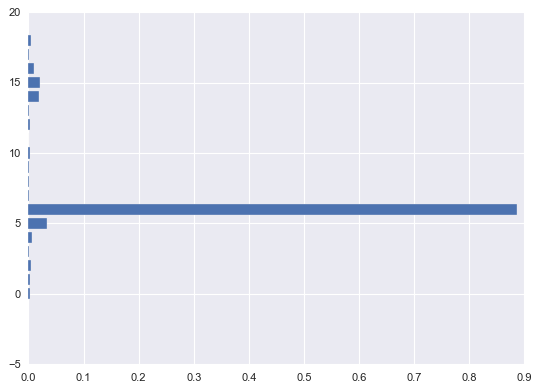

In [80]:
# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
     'Feature: %0d, Score: %.5f' % (i,v)

features = {}
for feature, imp in zip(x, model.feature_importances_):
    features[feature]=imp
print(features)

# plot feature importance
plt.barh([x for x in range(len(importance))], importance)
plt.autoscale(enable=True, axis='x', tight=False)
plt.show()


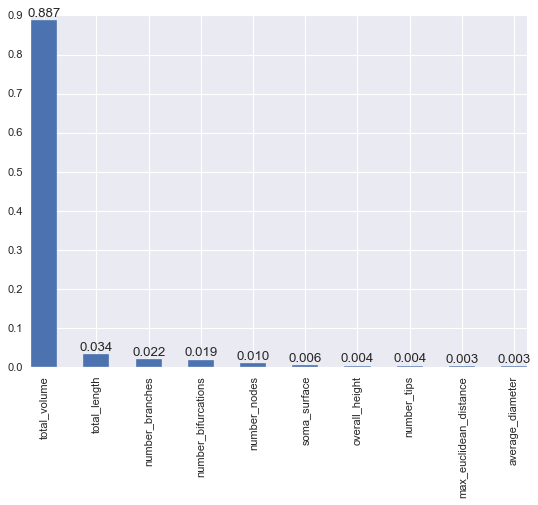

In [81]:
ax=(pd.Series(model.feature_importances_, index=x.columns)
   .nlargest(10)
   .plot(kind='bar'))

#Add the counts on top the bars
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.3f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
    
plt.autoscale(enable=True, axis='x', tight=False)
plt.show()

As per Random Forest Regression function we can see that the ten most important variables in a decreasing order sorted on the basis of their feature importances are:

1) Total Volume
2) Total Length
3) Number nodes
4) Number tips
5) Number branches
6) Soma Surface
7) Max path distance
8) Average Parent daughter ratio
9) Overall Depth
10) Average diameter

As per Linear Regression obtained above in Q4, we can see that the important variables are:

total_volume, total_length, average_diameter, overall_depth, number_stems, average_contraction, number_bifurcations, average_fragmentation, overall_width, soma_surface, average_parent_daughter_ratio.


We can see that as per the two outputs: **Total volume and Total Length** are the most significant factors contributing to the prediction amongst other common variables such as Soma surface, Average Parent daughter ratio, Average diameter, Overall Depth

**(c) Use the random forest regression model to predict the total surface area of a neuron
for the test set. Create a scatter plot of the true surface area of a neuron versus the
predicted surface area. Interpret your plot.**

In [57]:
y_pred=model.predict(x_test)

/Users/divyaa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Y_Pred')

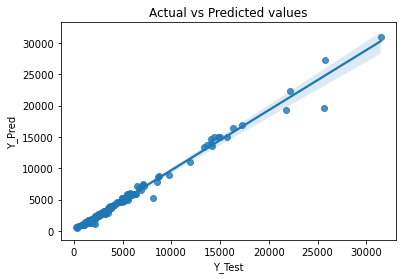

In [58]:
#create scatterplot with regression line and confidence interval lines
sns.regplot(y_test, y_pred)
#Set title
plt.title('Actual vs Predicted values')
# Set x-axis label
plt.xlabel('Y_Test')
# Set y-axis label
plt.ylabel('Y_Pred')

A residual plot shows the difference between the observed response and the fitted response values.Scatter plots of Actual vs Predicted are one of the richest form of data visualization. 


The ideal residual plot, called the null residual plot, shows a random scatter of points forming an approximately constant width band around the identity line.

From the diagonal line it can be seen that most points are closer to the regression line barring a few outliers. We also observe a leverage point around 26000 on the X axis which is an unsual point. 

The R squared of this model is high due to which the points are closer to the regression line with less variance.
This plot can be analyzed in three different parts:

1) Part 1 for the range of Y_Test values 0 - 10,000. This region has the best prediction in the model wherein the Actual and the predicted values are almost the same and in close proximity to the regression line.

2) Part 2 for the range of Y_Test values 10,000 - 22,500. This region has scattered points over the interval with more variance and error as compared to the part 1. The points seem further away from the line ans some points fall outside the confidence Interval lines.

3) Part 3 for the range of Y_Test values > 22,500. This region has very few data points as compared to the first two regions with one leverage point around 26,000 which is extremely far from the regression line. A Leverage point is a point with an unusal X value which is Y_test in this case. The predicted value for this point is less (around 17000) as compared to what is expected showing extreme variance. 

It is important to check the fit of the model and assumptions – constant variance, normality, and independence of the errors, using the residual plot. 


**Assumptions and how to check:**

Model function is linear: The points form a pattern when the model function is incorrect.
You might be able to transform variables or add polynomial and interaction terms to remove the pattern.

Constant variance: If the points tend to form an increasing, decreasing or non-constant width band, then the variance is not constant. You should consider transforming the response variable or incorporating weights into the model. When variance increases as a percentage of the response, you can use a log transform, although you should ensure it does not produce a poorly fitting model.

Even with non-constant variance, the parameter estimates remain unbiased if somewhat inefficient. However, the hypothesis tests and confidence intervals are inaccurate.

Normality: Examine the normal plot of the residuals to identify non-normality.
Violation of the normality assumption only becomes an issue with small sample sizes. For large sample sizes, the assumption is less important due to the central limit theorem, and the fact that the F- and t-tests used for hypothesis tests and forming confidence intervals are quite robust to modest departures from normality. 

Independence: When the order of the cases in the dataset is the order in which they occurred:
Examine a sequence plot of the residuals against the order to identify any dependency between the residual and time.


**(d) Assess the performance of a random forest regression model with 5, 10, 20, 50,
100, 200, 500 and 1000 trees in predicting the total surface area of a neuron. You
should repeat the model fit and prediction 30 times for each number of trees, using
a different random state for each repeat. Create a plot of the model performance
as a function of the number of trees (use a log axis for the number of trees). The
plot should show the mean and standard error of the performance metric for each
number of trees. Discuss your findings.**

In [59]:
import random

Mean=[]

trees=[5,10,20,50,100,200,500,1000]
for j in trees:
    MSE=[]
    for i in range(0,30):
        rf = RandomForestRegressor(n_estimators=j,random_state=random.randint(0,100))
        rf.fit(x_train, y_train)
        rf_test_pred = rf.predict(x_test)
        MSE_rf = np.mean(pow((rf_test_pred- y_test),2))
        MSE.append(MSE_rf)
    Mean.append(np.mean(MSE))
Mean

[771224.1345497986,
 471013.4385710865,
 416149.8064628561,
 365985.49365658185,
 342628.9278581973,
 329242.6581086486,
 334734.9670735258,
 328443.8766963219]

Text(0, 0.5, 'Mean & Standard Error')

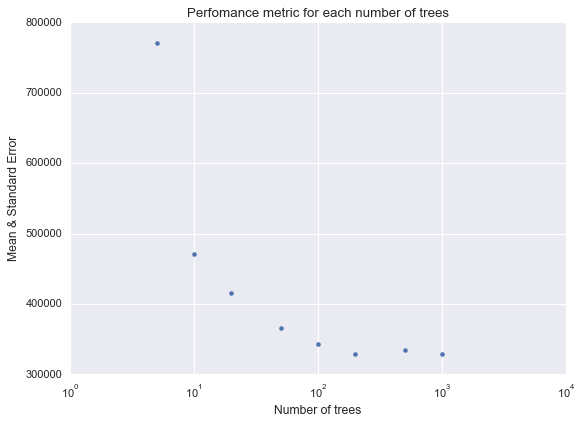

In [83]:
plt.scatter(trees, Mean) 
plt.style.use("seaborn")
plt.xscale('log')  #Setting up log axis
plt.title("Perfomance metric for each number of trees")
plt.xlabel("Number of trees")
plt.ylabel("Mean & Standard Error")

A random forest model is an ensemble model that is made up of a collection of simple models called decision trees.The number of trees parameter in a random forest model determines the number of simple models, or the number of decision trees, that are combined to create the final prediction. If the number of trees is set to 100, then there will be 100 simple models that are trained on the data. After that, the predictions made by each of these models will be aggregated up to create one final prediction.

The main advantage of using a large number of simple models, or decision trees, in your random forest model is that predictive performance tends to increase as the number of trees increases which can be confirmed by the findings above.

As per the model plotted above, we can see that as the number of trees increase the Mean Standard error of the model decreases.

However, It is important to note that after a certain point, you start to hit a point of diminishing returns where the scale of the performance gains you see from adding more trees gets smaller and smaller. As observed, for trees 500 and 1000, there is not much difference in the MSE value received giving diminishing returns.

It is also seen that as the number of trees increase, the longer it takes to train the model. Slow training times can be particularly problematic when you are training many different models with different combinations of hyperparameters.




**(e) Explain the rationale for fitting the model multiple time with different random
states.**

Random state is a model hyper parameter used to control the randomness involved in the Machine Learning models.

It usually takes one of the following values.

**None:** This is the default value. This allows the function to use the global random state instance from np.random . 

If you call the same function multiple times with random_state=None, that function will produce different results across different executions.


**int:** We can use an integer for random_state . Yes! We can use any integer including 0, but not negative ones, only positive integers. The most popular integers are 0 and 42. When we use an integer for random_state, the function will produce the same results across different executions. The results are only changed if we change the integer value.


The train_test_split() function is used to split the dataset into train and test sets. By default, the function shuffles the data (with shuffle=True) before splitting. The random state hyperparameter in the train_test_split() function controls the shuffling process.


With random_state=None , we get different train and test sets across different executions and the shuffling process is out of control.


With random_state=0 , we get the same train and test sets across different executions. With random_state=42, we get the same train and test sets across different executions, but in this time, the train and test sets are different from the previous case with random_state=0 .


The train and test sets directly affect the model’s performance score. Because we get different train and test sets with different integer values for random_state in the train_test_split() function, the value of the random state hyperparameter indirectly affects the model’s performance score.

___We generally use a random state in machine learning models for the following reasons:___

**Consistency:** Sometimes we need consistent results across different executions of the models. 


**Experimental purposes:** Sometimes, we tune our models manually. In those cases, we want to keep all other hyperparameters including the random state constant except the one(s) we’re tuning. For that purpose, we can set an integer for the random state in machine learning models.


**Increase model performance:** Sometimes, you can get significant performance improvement for your model by running it multiple times with different random states. This is because random_state is also a hyperparameter and we can tune that one also to get better results.

We can use cross-validation to mitigate the effect of randomness involved in machine learning models.
The random state hyperparameter gives direct control over multiple types of the randomness of different functions.



**Q6) Clustering algorithms to identify different neuron types**

**(a) Perform a k-means cluster analysis, using the morphological measurements as the
features. Run the clustering algorithm for different numbers of clusters (integers
from 1 to 10). Plot the model performance as a function of the number of clusters
and identify the optimal number of clusters for this data**

Clustering is a broad set of techniques for finding subgroups of observations within a data set. When we cluster observations, we want observations in the same group to be similar and observations in different groups to be dissimilar. Because there isn’t a response variable, this is an unsupervised method, which implies that it seeks to find relationships between the n observations without being trained by a response variable. Clustering allows us to identify which observations are alike, and potentially categorize them therein. K-means clustering is the simplest and the most commonly used clustering method for splitting a dataset into a set of k groups.

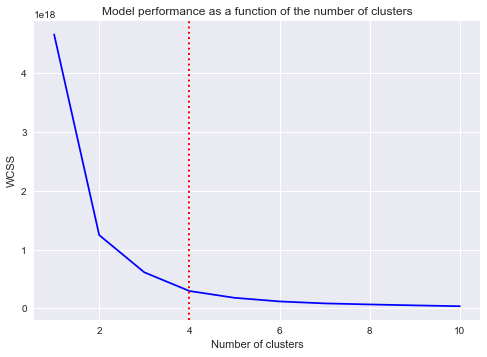

In [61]:
#Using the Elbow method

wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(neu) 
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss, color='blue')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.title('Model performance as a function of the number of clusters')
plt.axvline(x = 4, color = 'red', ls=':', lw=2,label = 'axvline - full height')
plt.show()

In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1.

When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

Hence, for our model the optimal cluster is 4.


In [62]:
#Assigning column values to a variable X

X=neu[['average_diameter',
 'overall_depth',
 'overall_height',
 'overall_width',
 'soma_surface',
 'total_length',
 'total_surface',
 'total_volume',
 'average_bifurcation_angle_local',
 'average_contraction',
 'average_fragmentation',
 'average_parent_daughter_ratio',
 'max_branch_order',
 'max_euclidean_distance',
 'max_path_distance',
 'number_bifurcations',
 'number_branches',
 'number_nodes',
 'number_stems',
 'number_tips']]

In [63]:
#Fitting the model with optimal cluster

kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)
X['Cluster']=y_kmeans
X['Cluster'].value_counts() #Check the number of values in each cluster distribution

0    425
2    185
1     76
3     15
Name: Cluster, dtype: int64

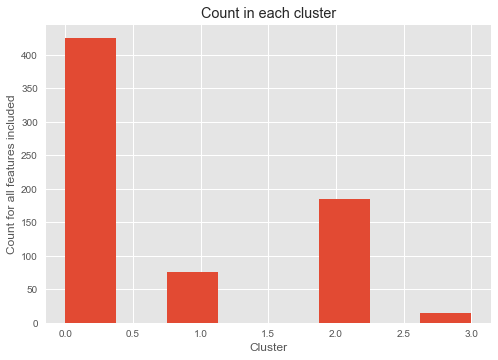

In [64]:
plt.style.use('ggplot')
plt.hist(X['Cluster'], bins=8)
plt.title('Count in each cluster')
plt.xlabel('Cluster')
plt.ylabel('Count for all features included')
plt.show()

From the bar graph plotted above we can see the maximum number of values belong to Cluster 1 : 425 rows, followed by 76 values in Cluster 2, 185 data values in Cluster 3 and the least of 15 values in Cluster 4.

**(b) Perform a k-means cluster analysis, using the optimal number of clusters (identified
in part (a)), and identify the most discriminatory variables.
(Hint: Create histograms for each variable, with the data separated by cluster.)**

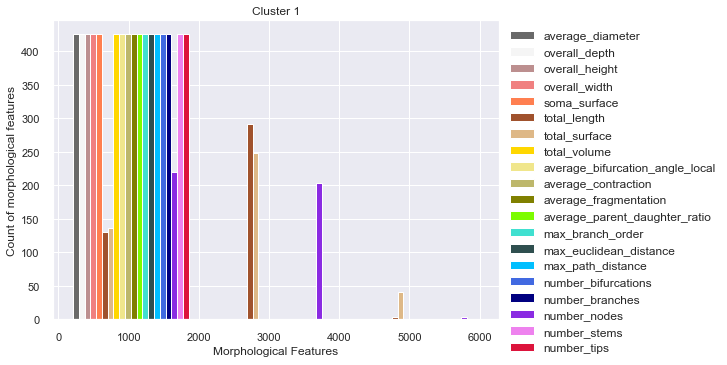

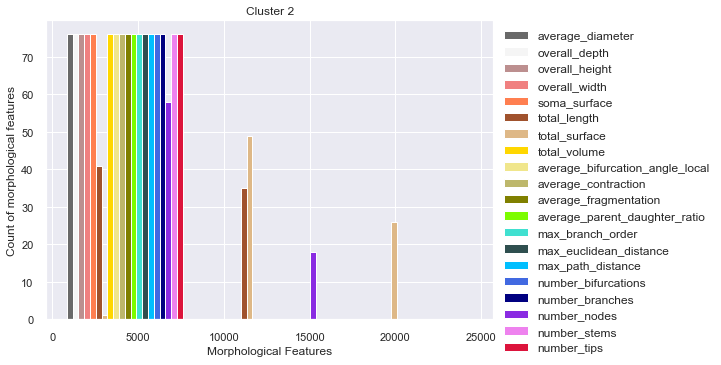

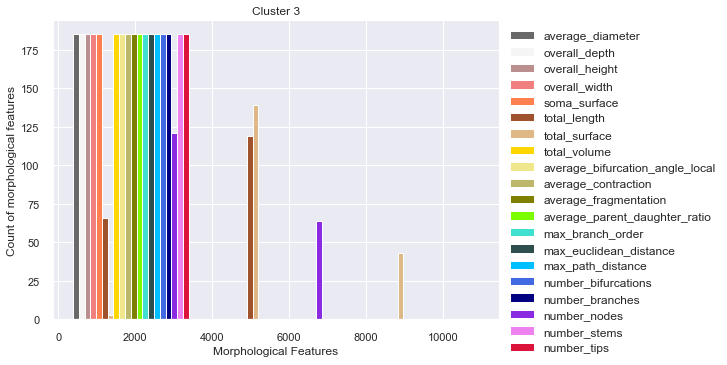

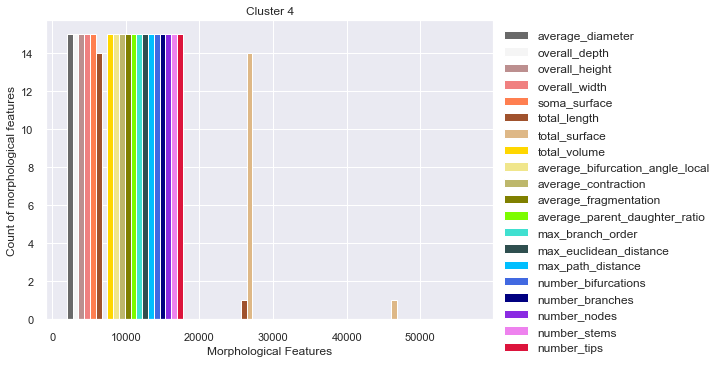

In [65]:
#Since Optimal number of clusters identified are we we create four different histograms to identify the
#most discriminatory variables

C0=X[X['Cluster']== 0]
C0=C0.drop(['Cluster'], axis = 1)

C1=X[X['Cluster']== 1]
C1=C1.drop(['Cluster'], axis = 1)

C2=X[X['Cluster']== 2]
C2=C2.drop(['Cluster'], axis = 1)

C3=X[X['Cluster']== 3]
C3=C3.drop(['Cluster'], axis = 1)

#Defining a color pallette 

colors = ['dimgray', 'whitesmoke', 'rosybrown','lightcoral','coral','sienna','burlywood','gold','khaki',
          'darkkhaki','olive','lawngreen','turquoise','darkslategrey','deepskyblue','royalblue',
          'navy','blueviolet', 'violet','crimson']

sns.set(style="darkgrid")

plt.hist(C0, bins= 3, linewidth=1,color=colors)
plt.xlabel("Morphological Features")
plt.ylabel("Count of morphological features")
plt.title("Cluster 1")
plt.legend(X.columns, bbox_to_anchor=(1,1), loc= "upper left", prop={'size':12})
plt.show()

plt.hist(C1, bins= 3, linewidth=1,color=colors)
plt.xlabel("Morphological Features")
plt.ylabel("Count of morphological features")
plt.title("Cluster 2")
plt.legend(X.columns, bbox_to_anchor=(1,1), loc= "upper left", prop={'size':12})
plt.show()

plt.hist(C2, bins= 3, linewidth=1,color=colors)
plt.xlabel("Morphological Features")
plt.ylabel("Count of morphological features")
plt.title("Cluster 3")
plt.legend(X.columns, bbox_to_anchor=(1,1), loc= "upper left", prop={'size':12})
plt.show()

plt.hist(C3, bins= 3,linewidth=1, color=colors )
plt.xlabel("Morphological Features")
plt.ylabel("Count of morphological features")
plt.title("Cluster 4")
plt.legend(X.columns, bbox_to_anchor=(1,1), loc= "upper left", prop={'size':12})
plt.show()

From the histogram plot, we have segregated the data in four different clusters and plotted them individually for all morphological parameters in the data set to observe that the three main distinct variables are:

1) total length

2) total surface

3) number nodes

**(c) Create a series of scatter plots for the most discriminatory variables, colouring the
points by cluster number. Discuss your findings. Do your findings support the
claim that multiple categories of neurons, with distinctly different morphological
properties, are included in this dataset?**

/Users/divyaa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


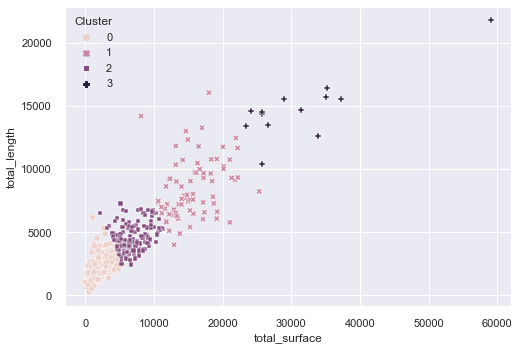

In [66]:
sns.scatterplot('total_surface' , 'total_length' , data=X, hue='Cluster',style='Cluster')
plt.show()

/Users/divyaa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


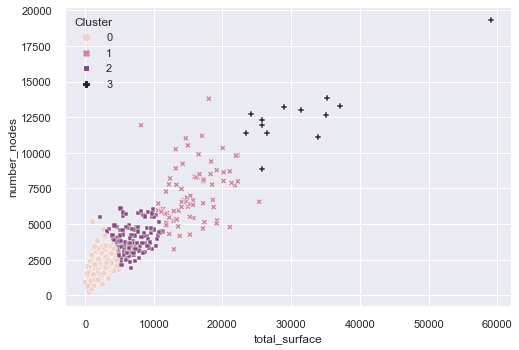

In [67]:
sns.scatterplot('total_surface', 'number_nodes', data=X, hue='Cluster',style='Cluster')
plt.show()


/Users/divyaa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


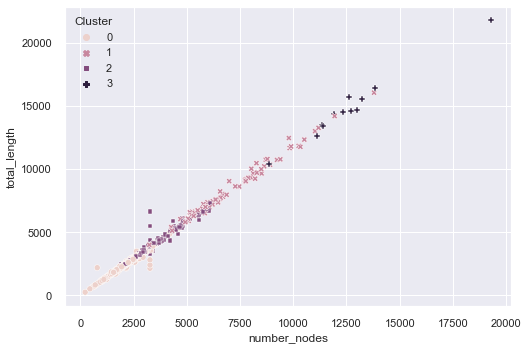

In [68]:
sns.scatterplot('number_nodes','total_length', data=X, hue='Cluster', style='Cluster')
plt.show()

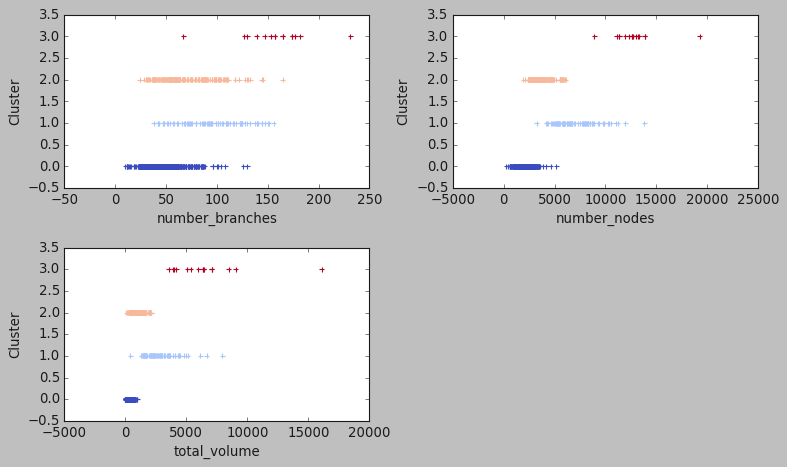

In [85]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.scatter(X['number_branches'],X['Cluster'], marker='+', c=X['Cluster'], cmap=plt.cm.coolwarm)
plt.xlabel('number_branches')
plt.ylabel('Cluster')
plt.style.use("classic")

plt.subplot(2,2,2)
plt.scatter(X['number_nodes'],X['Cluster'],marker='+', c=X['Cluster'], cmap=plt.cm.coolwarm)
plt.xlabel('number_nodes')
plt.ylabel('Cluster')

plt.subplot(2,2,3)
plt.scatter(X['total_volume'],X['Cluster'],marker='+', c=X['Cluster'], cmap=plt.cm.coolwarm)
plt.xlabel('total_volume')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()

Observing the scatter plots above, we have plotted the relation between the three discriminatory variables identified individually.

From the first graph i.e Total Surface vs Total Length, we can see that the correlation (0.91) is strong positive however, there is high variance between them as the points are scattered away from the centre line of regression. We can also observe an unusual influential point at around 60000,22000 coordinate in the graph which acts as an outlier.

Analyzing the second graph i.e Total surface vs Number of nodes, we can see that the positive correlation (0.909) is less than the first graph and the data points are slightly more away from the centre line of regression. An outlier is also observed in this graph on the top right of the chart at an unusual point.

Analyzing the third graph i.e Total Length vs Number of nodes, we can see that this graph has the strongest positive correlation (0.99) with most data points near the centre line of regression showing it to be a good fit for the model.
Most of the points are overlapping and show very less variance and standard error. However, we can still spot a few outliers in between 2500-5000 on the X axis and one extremely unusual point on the top right of the graph.

However, from all the graphs we can say that most points of all the Clusters are spread out in a sequential manner from the graph with Cluster 1 data points to be closer to the origin and followed by points of the other three clusters as we move away from it.

***Hence, from my findings above I can support the claim that multiple categories of neurons, with distinctly different morphological properties, are included in this dataset.***


**(d) Identify another clustering algorithm that may be suitable for this data. Give an
overview of your chosen algorithm and discuss the type of problems it works best for.
Repeat part (a)–(c) using your chosen algorithm. Discuss your results in relation
to those from the k-means cluster analysis.**

K-means clustering is a very simple and fast algorithm. Furthermore, it can efficiently deal with very large data sets. However, there are some weaknesses of the k-means approach. One potential disadvantage of K-means clustering is that it requires us to pre-specify the number of clusters. 

**Hierarchical clustering** is an alternative approach which does not require that we commit to a particular choice of clusters. Hierarchical clustering has an added advantage over K-means clustering in that it results in an attractive tree-based representation of the observations, called a dendrogram. Hierarchical clustering algorithms work by assuming each data points is itself a cluster. The closest two clusters are iteratively merged until we are left with one cluster containing all of the data.

We will use Agglomerative Clustering, a type of hierarchical clustering that follows a bottom up approach. We begin by treating each data point as its own cluster. Then, we join clusters together that have the shortest distance between them to create larger clusters. This step is repeated until one large cluster is formed containing all of the data points.

Hierarchical clustering requires us to decide on both a distance and linkage method. We will use euclidean distance and the Ward linkage method, which attempts to minimize the variance between clusters.


In [70]:
# Copy X into X1
X1 = X.drop(['Cluster'],axis=1)
X1.head()

,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume,average_bifurcation_angle_local,average_contraction,average_fragmentation,average_parent_daughter_ratio,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,number_nodes,number_stems,number_tips
0,0.195628,90.3529,548.798070,257.109717,128.269219,3658.629571,2252.681880,115.626135,78.026948,0.866136,48.081967,0.866582,7.0,476.921223,550.691106,31.0,70.0,3041.0,8.0,39.0
1,0.457635,87.0383,717.408343,199.214267,430.635072,4158.819949,5944.196007,730.014704,86.349668,0.656121,52.416667,0.950502,15.0,650.637431,957.710930,30.0,67.0,3271.0,7.0,37.0
2,0.295455,75.3286,584.083922,386.076695,502.033948,2667.618389,2472.795020,197.063796,71.911353,0.867122,73.821429,0.816243,5.0,477.440600,569.974920,14.0,32.0,2151.0,4.0,18.0
3,0.414033,89.0718,284.641670,239.492610,383.828302,1543.941010,2008.838025,237.466517,72.177287,0.897780,42.266667,0.822614,4.0,212.448082,249.521471,16.0,35.0,1292.0,3.0,19.0
4,0.201323,44.5237,302.038542,323.493562,120.229052,1621.871325,1027.220686,54.521240,70.758367,0.928043,39.733333,0.803137,3.0,242.351930,258.868561,15.0,36.0,1397.0,6.0,21.0


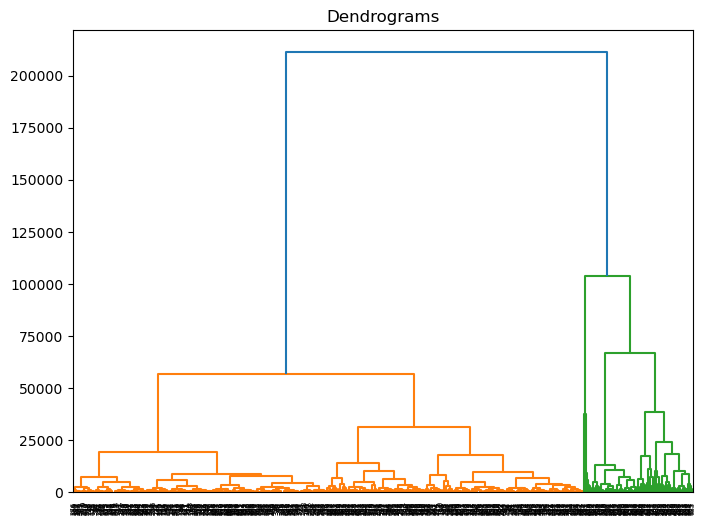

In [91]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(8,6)) 
plt.style.use("default")
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X1, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. 
The vertical line with maximum distance is the red line and hence we can decide a threshold of 150000 and cut the dendrogram.

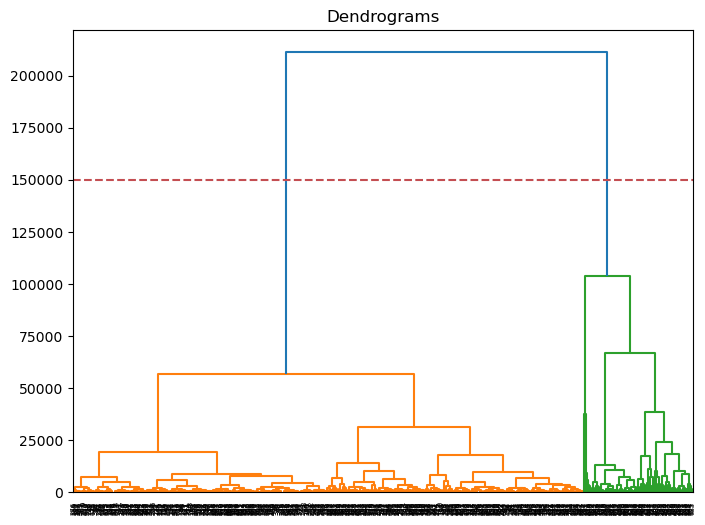

In [92]:
plt.figure(figsize=(8, 6))  
plt.title("Dendrograms") 
plt.style.use("default")
dend = shc.dendrogram(shc.linkage(X1, method='ward'))
plt.axhline(y=150000, color='r', linestyle='--')
plt.show()

In [73]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
HC=cluster.fit_predict(X1)
HC

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

We can see the values of 0s and 1s in the output since we defined 2 clusters. 
0 represents the points belonging to cluster 1 and 1 represents points in the cluster 2.

Plotting the same on histogram:

In [74]:
X1['Cluster']=HC
X1['Cluster'].value_counts() #Check the number of values in each cluster distribution

1    577
0    124
Name: Cluster, dtype: int64

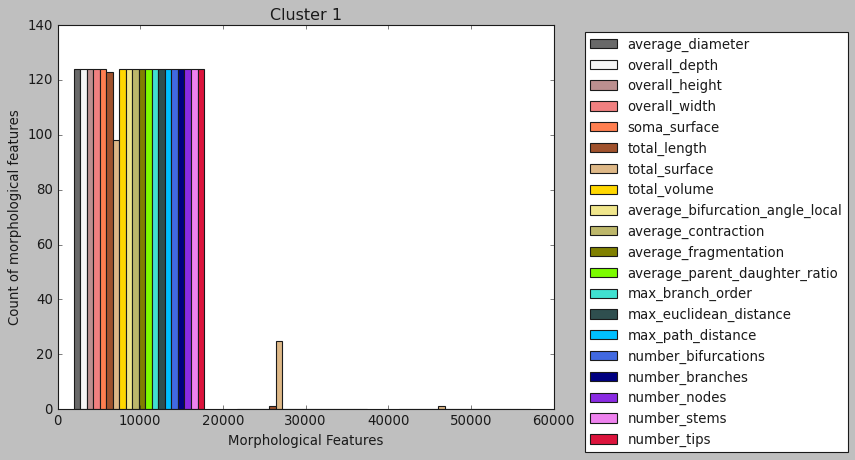

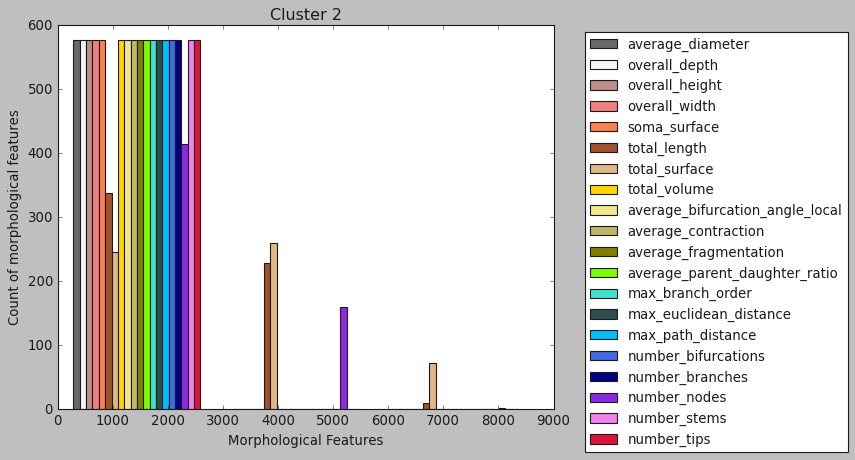

In [75]:
H0=X1[X1['Cluster']== 0]
H0=H0.drop(['Cluster'], axis = 1)

plt.hist(H0, bins= 3, linewidth=1 , color=colors)
plt.xlabel("Morphological Features")
plt.ylabel("Count of morphological features")
plt.title("Cluster 1")
plt.legend(H0.columns, bbox_to_anchor=(1.05,1), loc= "upper left", prop={'size':12})
plt.show()

H1=X1[X1['Cluster']== 1]
H1=H1.drop(['Cluster'], axis = 1)

plt.hist(H1, bins= 3, linewidth=1, color=colors)
plt.xlabel("Morphological Features")
plt.ylabel("Count of morphological features")
plt.title("Cluster 2")
plt.legend(H1.columns, bbox_to_anchor=(1.05,1), loc= "upper left", prop={'size':12})
plt.show()


From the graph above we can see that the two common distinct variables are:

1) Total length 

2) Total Surface

Text(0, 0.5, 'Total_surface')

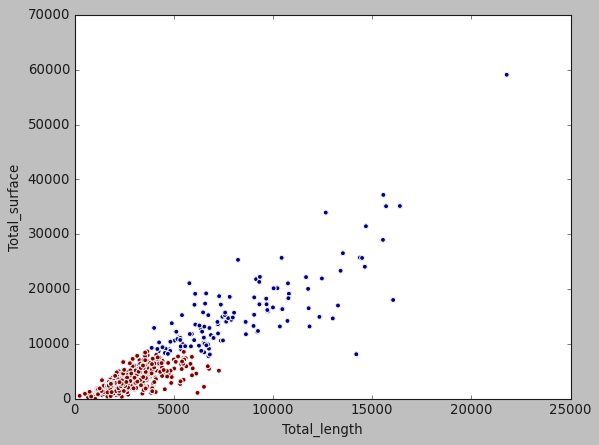

In [76]:
plt.figure(figsize=(8, 6)) 
plt.scatter(X1['total_length'], X1['total_surface'], c=cluster.labels_) 
plt.style.use("bmh")
plt.xlim(0, 25000)
plt.ylim(0, 70000)
plt.xlabel("Total_length")
plt.ylabel("Total_surface")

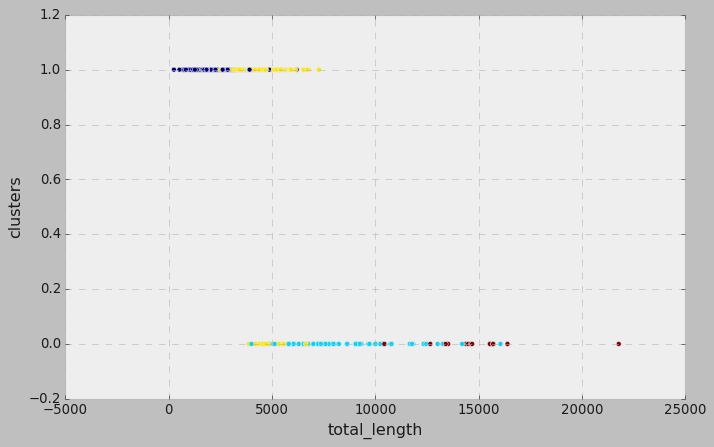

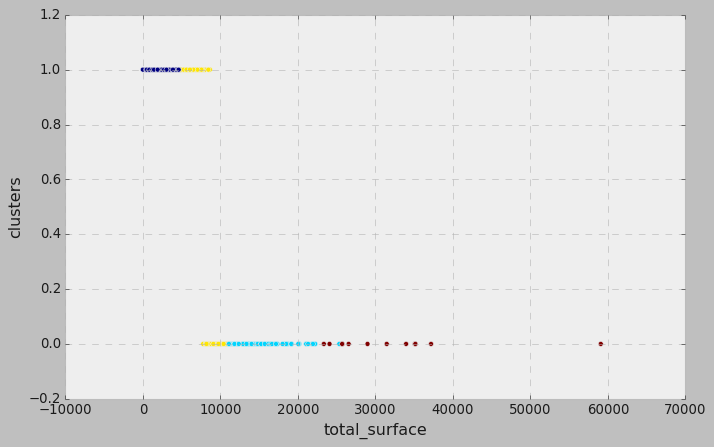

In [77]:
plt.figure(figsize=(10,6))
plt.scatter(X1['total_length'],X1['Cluster'], c=X['Cluster'])
plt.xlabel('total_length')
plt.ylabel('clusters')
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(X1['total_surface'],X1['Cluster'], c=X['Cluster'])
plt.xlabel('total_surface')
plt.ylabel('clusters')
plt.show()

From the graphical observation above, we can observe the histogram and scatter plots for two clusters using the Hierarchical clustering method. The discriminatory variables remain the same as above with less observations in each as compared to that in K-Means.

As per the scatter plots we can see that the datapoints here also have an outlier in them.

The correlation here is positive and strong with some variance in them.

From the comparision above we can confirm that K means methods used are normally less computationally intensive and are suited with large datasets as compared to Hierarchial in which Ddivisive methods work in the opposite direction, beginning with one cluster that includes all the records and Hierarchical methods are especially useful when the target is to arrange the clusters into a natural hierarchy.

**Declaration:**

**“I confirm that all work submitted is my own and that I have neither given, sought,
nor received aid in relation to this assignment"**